In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_1 = pd.read_csv("../data/electricity-sell-price.csv", delimiter=";", decimal=",")
df_2 = pd.read_csv("../data/electricity-exchange-price.csv", delimiter=";", decimal=",")
df_3 = pd.read_csv("../data/electricity-tax-price.csv", delimiter=";", decimal=",")


df_1["Timestamp"] = pd.to_datetime(df_1["Timestamp"], format="%d/%m/%Y")
df_1.set_index("Timestamp", inplace=True)
#df_1.sort_index(inplace=True)

df_2["Timestamp"] = pd.to_datetime(df_2["Timestamp"], format="%d/%m/%Y")
df_2.set_index("Timestamp", inplace=True)
df_2.sort_index(inplace=True)

df_3["Timestamp"] = pd.to_datetime(df_3["Timestamp"], format="%d/%m/%Y")
df_3.set_index("Timestamp", inplace=True)
df_3.sort_index(inplace=True)

df_1

,K1,K2,L1,L2,M1,M2
Timestamp,,,,,,
1997-01-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-02-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-03-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-04-01,4.83,4.39,3.42,2.75,4.28,3.65
1997-05-01,4.83,4.39,3.42,2.75,4.28,3.65
...,...,...,...,...,...,...
2023-05-01,6.50,4.79,4.05,4.03,4.28,3.90
2023-06-01,8.71,6.88,6.14,6.11,6.36,5.99
2023-07-01,7.41,5.58,4.84,4.81,5.06,4.69


In [5]:
df_1.isna().sum()

K1    13
K2    13
L1    13
L2    13
M1    13
M2    13
dtype: int64

In [6]:
df_1 = df_1.asfreq(freq="MS", method="ffill")
df_1

,K1,K2,L1,L2,M1,M2
Timestamp,,,,,,
1997-01-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-02-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-03-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-04-01,4.83,4.39,3.42,2.75,4.28,3.65
1997-05-01,4.83,4.39,3.42,2.75,4.28,3.65
...,...,...,...,...,...,...
2023-05-01,6.50,4.79,4.05,4.03,4.28,3.90
2023-06-01,8.71,6.88,6.14,6.11,6.36,5.99
2023-07-01,7.41,5.58,4.84,4.81,5.06,4.69


In [7]:
df_1_cols = df_1.columns

In [8]:
df_1.fillna(0, inplace=True)
df_2.fillna(0, inplace=True)

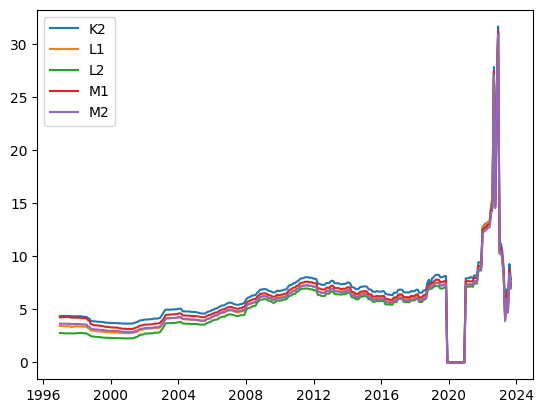

In [9]:
for i in df_1.columns[1:]:
    plt.plot(df_1.index, df_1[i], label=i)
    
plt.legend()
plt.show()

In [10]:
y = df_1.values
y

array([[ 4.82,  4.38,  3.45,  2.77,  4.26,  3.66],
       [ 4.82,  4.38,  3.45,  2.77,  4.26,  3.66],
       [ 4.82,  4.38,  3.45,  2.77,  4.26,  3.66],
       ...,
       [ 7.41,  5.58,  4.84,  4.81,  5.06,  4.69],
       [11.13,  9.29,  8.55,  8.52,  8.77,  8.4 ],
       [ 9.69,  7.85,  7.12,  7.09,  7.34,  6.97]])

In [13]:
#df_1.reset_index(inplace=True)
df_1["day"] = df_1.index.day
df_1["month"] = df_1.index.month
df_1["year"] = df_1.index.year

X = df_1[["day", "month", "year"]]
X

,day,month,year
Timestamp,,,
1997-01-01,1,1,1997
1997-02-01,1,2,1997
1997-03-01,1,3,1997
1997-04-01,1,4,1997
1997-05-01,1,5,1997
...,...,...,...
2023-05-01,1,5,2023
2023-06-01,1,6,2023
2023-07-01,1,7,2023


In [14]:
df_1.to_csv("./feature_matrix.csv", sep=";", decimal=",")

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# forest = RandomForestRegressor(max_depth=2, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(random_state=0))

model.fit(X, y)
#model.fit(np.array([X[i] for i in train_0]).reshape(-1, 1), y.iloc[train_0])
#model.fit(X.reshape(-1, 1), y)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=0))

In [83]:
model.get_params()

{'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(random_state=0),
 'n_jobs': None}

In [120]:
from sklearn.model_selection import cross_validate

def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


#model.fit(X.iloc[train_0], t.iloc[train_0])
#evaluate(model, X.iloc[test_0], t.iloc[test_0], cv=ts_cv)

evaluate(model, X, y, cv=None)

Mean Absolute Error:     1.277 +/- 1.543
Root Mean Squared Error: 1.775 +/- 2.324


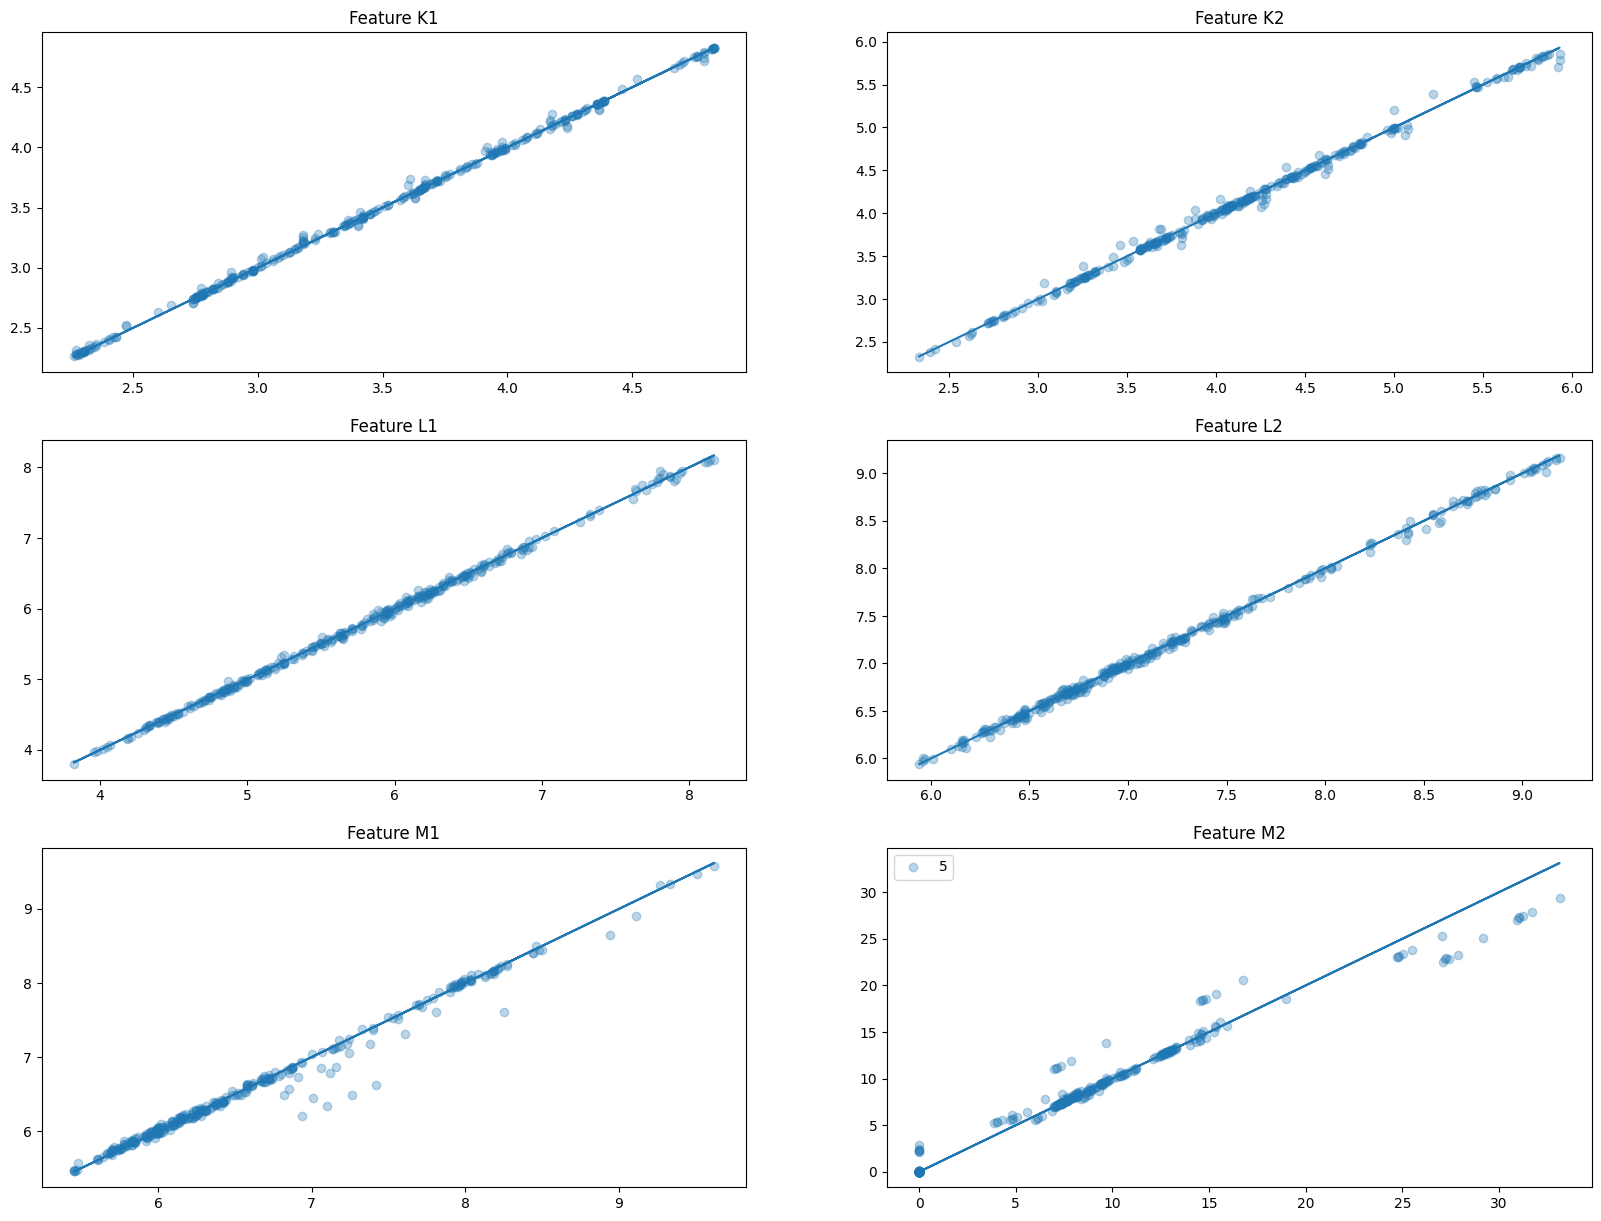

In [121]:
#.reshape(-1,1)
y_pred = model.predict(X)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))


# for i in range(0,6):
#     plt.scatter(y.reshape(6, -1)[i], y_pred.reshape(6, -1)[i], label=i, alpha=0.3)
x = np.linspace(0,5,21)
for i, ax in enumerate(axes.flatten()):
    y_temp = y.reshape(6, -1)[i]
    y_pred_temp = y_pred.reshape(6, -1)[i]
    ax.plot(y_temp, y_temp)
    ax.scatter(y_temp, y_pred_temp, label=i, alpha=0.3)
    ax.set_title(f"Feature {df_1_cols[i]}")

plt.legend()
plt.show()

In [122]:
312 // 3

104

2


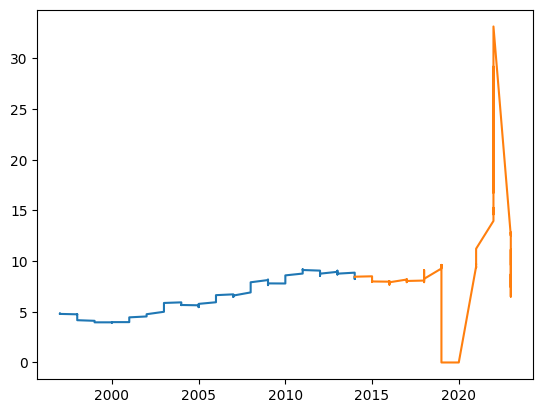

In [141]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=2,
    #gap=1,
    #max_train_size=200,
    #test_size=110 # n_samples // (n_splits + 1)
)

all_splits = list(ts_cv.split(X, y))
print(len(all_splits))
train_0, test_0 = all_splits[1]

t = pd.DataFrame(y)

plt.plot(X.iloc[train_0, 2], t.iloc[train_0, 0])
plt.plot(X.iloc[test_0, 2], t.iloc[test_0, 0])

In [142]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# model = MultiOutputRegressor(HistGradientBoostingRegressor(
#     # categorical_features=categorical_columns,
#     random_state=0,
# ))

model.fit(X.iloc[train_0], t.iloc[train_0])
#model.fit(np.array([X[i] for i in train_0]).reshape(-1, 1), y.iloc[train_0])

evaluate(model, X.iloc[test_0], t.iloc[test_0], cv=ts_cv)

Mean Absolute Error:     6.758 +/- 4.169
Root Mean Squared Error: 8.200 +/- 4.468


Mean Absolute Error:     0.216 +/- 0.126
Root Mean Squared Error: 0.275 +/- 0.160

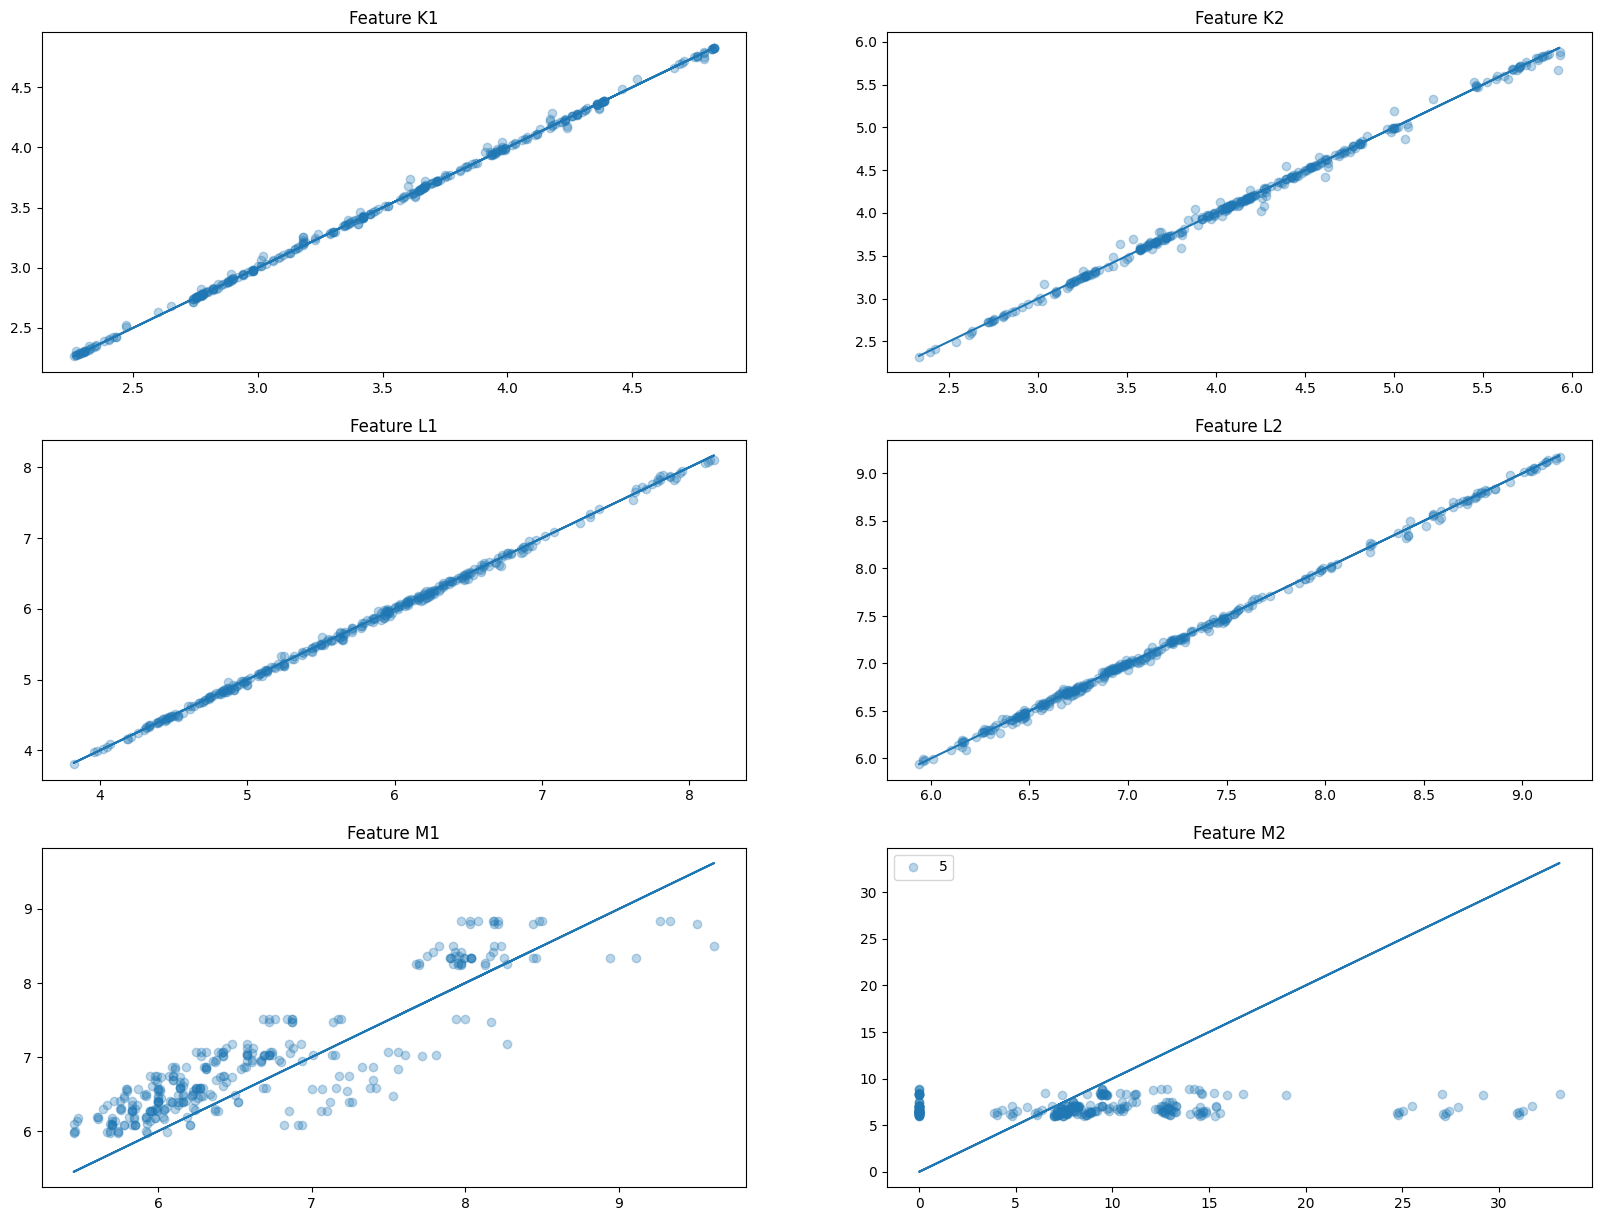

In [143]:
# y_pred = model.predict(X)

# plt.plot(y, y)
# for i in range(0,6):
#     plt.scatter(y.reshape(6, -1)[i], y_pred.reshape(6, -1)[i], label=i, alpha=0.3)
# plt.legend()
# plt.show()

#.reshape(-1,1)
y_pred = model.predict(X)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))


# for i in range(0,6):
#     plt.scatter(y.reshape(6, -1)[i], y_pred.reshape(6, -1)[i], label=i, alpha=0.3)
x = np.linspace(0,5,21)
for i, ax in enumerate(axes.flatten()):
    y_temp = y.reshape(6, -1)[i]
    y_pred_temp = y_pred.reshape(6, -1)[i]
    ax.plot(y_temp, y_temp)
    ax.scatter(y_temp, y_pred_temp, label=i, alpha=0.3)
    ax.set_title(f"Feature {df_1_cols[i]}")

plt.legend()
plt.show()